In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sales_data.csv")
df.head()

,order_id,order_date,product_id,product_name,sales
0,AG-2011-2040,01-01-2011,OFF-TEN-10000025,"Tenex Lockers, Blue",408
1,IN-2011-47883,01-01-2011,OFF-SU-10000618,"Acme Trimmer, High Speed",120
2,HU-2011-1220,01-01-2011,OFF-TEN-10001585,"Tenex Box, Single Width",66
3,IT-2011-3647632,01-01-2011,OFF-PA-10001492,"Enermax Note Cards, Premium",45
4,IN-2011-47883,01-01-2011,FUR-FU-10003447,"Eldon Light Bulb, Duo Pack",114


In [3]:
df.columns

Index(['order_id', 'order_date', 'product_id', 'product_name', 'sales'], dtype='object')

In [4]:
df.dtypes

order_id        object
order_date      object
product_id      object
product_name    object
sales            int64
dtype: object

In [5]:
df['order_date'] = pd.to_datetime(df['order_date'])

C:\Users\birap\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\birap\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\birap\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\birap\AppData\Local\Programs\Python\Python310\lib\site-packag

In [6]:
df.dtypes

order_id                object
order_date      datetime64[ns]
product_id              object
product_name            object
sales                    int64
dtype: object

In [21]:
#creating month column
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

In [22]:
df.head()

,order_id,order_date,product_id,product_name,sales,month,year
0,AG-2011-2040,2011-01-01,OFF-TEN-10000025,"Tenex Lockers, Blue",408,1,2011
1,IN-2011-47883,2011-01-01,OFF-SU-10000618,"Acme Trimmer, High Speed",120,1,2011
2,HU-2011-1220,2011-01-01,OFF-TEN-10001585,"Tenex Box, Single Width",66,1,2011
3,IT-2011-3647632,2011-01-01,OFF-PA-10001492,"Enermax Note Cards, Premium",45,1,2011
4,IN-2011-47883,2011-01-01,FUR-FU-10003447,"Eldon Light Bulb, Duo Pack",114,1,2011


In [9]:
total_sales = df.groupby('month').aggregate({"sales" : "sum"})

In [10]:
total_sales

,sales
month,
1,775794
2,722888
3,951379
4,851641
5,976429
6,1152392
7,838761
8,1247542
9,1244201


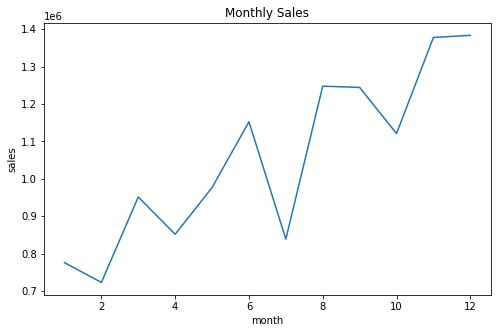

In [11]:
plt.figure(figsize = (8,5))
sns.lineplot(data = total_sales, x = 'month', y = 'sales')
plt.title("Monthly Sales")
plt.show()

#### Sales in more in the month of december

In [12]:
product_ordered = df.groupby('product_name').aggregate({"sales" : "sum"})

In [13]:
top_product_ordered = product_ordered.sort_values(by = 'sales', ascending = False).reset_index()[:3]

In [14]:
top_product_ordered

,product_name,sales
0,"Apple Smart Phone, Full Size",86936
1,"Cisco Smart Phone, Full Size",76441
2,"Motorola Smart Phone, Full Size",73159


In [15]:
#ploting top 3 items sold

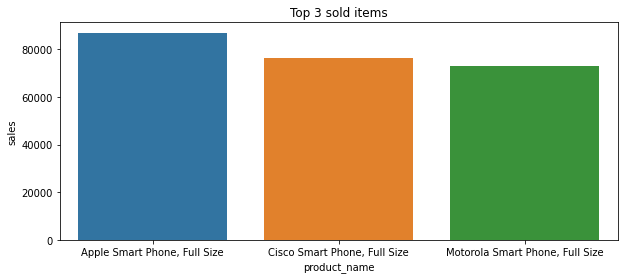

In [16]:
plt.figure(figsize = (10,4))
sns.barplot(data = top_product_ordered, x = 'product_name', y = 'sales')
plt.title("Top 3 sold items")
plt.show()

#### Task 1 :Top 3 ordered items are 
    Apple smart phone,
    Cisco smart phone,
    Motorola

In [17]:
bottom_product_ordered = product_ordered.sort_values(by = 'sales', ascending  = True).reset_index()[:3]

In [18]:
bottom_product_ordered

,product_name,sales
0,Eureka Disposable Bags for Sanitaire Vibra Gro...,2
1,Xerox 20,6
2,Avery 5,6


In [19]:
# Top 3 less sold products

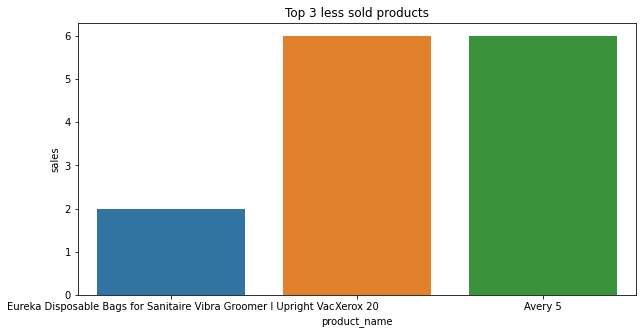

In [20]:
plt.figure(figsize = (10,5))
sns.barplot(data = bottom_product_ordered, x = 'product_name', y = 'sales')
plt.title("Top 3 less sold products")
plt.show()

#### Task 2 :Top 3 less ordered items are
    Eureka Disposable Bags,
    Xerox 20,
    Avery 5

#### Task3: Total Sales by year

In [25]:
year_data = df.groupby('year').aggregate({'sales' : 'sum'}).reset_index()
year_data

,year,sales
0,2011,2259511
1,2012,2677493
2,2013,3405860
3,2014,4300041


In [26]:
#ploting year vs sales

Text(0.5, 1.0, 'Year vs total sales')

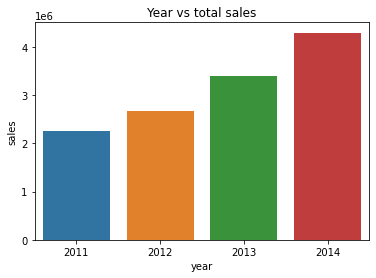

In [28]:
sns.barplot(data = year_data, x ='year', y = 'sales')
plt.title("Year vs total sales")